## 1. Camera data processing

### Load data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/Users/w.z/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/SleepData/苏州大学附属医院/Camera/camera20240620220949415042.csv'
df = pd.read_csv(file_path)

# Convert timestamp to a proper datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H%M%S%f')

# Display the first few rows of the dataframe
print(df.head())


                   timestamp    mean_r    mean_g    mean_b
0 2024-06-20 22:09:49.626041  2.646389  1.731215  2.085461
1 2024-06-20 22:09:49.632041  2.354803  2.490679  0.455645
2 2024-06-20 22:09:49.640044  1.585553  2.554162  1.299123
3 2024-06-20 22:09:49.647041  1.885192  2.312193  1.587810
4 2024-06-20 22:09:49.655041  1.014810  2.472130  2.951984


In [ ]:
# # Function to visualize the RGB data
# def plot_rgb_frame(ax, data, frame_number):
#     # Ensure frame number is within the correct range
#     if frame_number < 0 or frame_number >= len(data):
#         raise ValueError("Frame number out of range.")
    
#     # Extract the RGB values for the given frame
#     frame = data.iloc[frame_number]
#     r = frame['mean_r']
#     g = frame['mean_g']
#     b = frame['mean_b']
    
#     # Create an image filled with the RGB values
#     img = np.zeros((100, 100, 3), dtype=np.uint8)
#     img[..., 0] = r
#     img[..., 1] = g
#     img[..., 2] = b
    
#     # Display the image on the provided axes
#     ax.imshow(img)
#     ax.set_title(f"Frame {frame_number}")
#     ax.axis('off')



# # Function to plot a series of frames in a grid
# def plot_series_in_grid(data, start_frame, num_frames, grid_size):
#     fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
#     axes = axes.flatten()
    
#     for i in range(num_frames):
#         if i < len(axes):
#             plot_rgb_frame(axes[i], data, start_frame + i)
    
#     # Hide any remaining axes if there are fewer frames than grid slots
#     for ax in axes[num_frames:]:
#         ax.axis('off')
    
#     plt.tight_layout()
#     plt.show()

# # Example usage: plot 25 frames in a 5x5 grid starting from the 0th frame
# plot_series_in_grid(df, 0, 25, 5)

In [6]:
# Assuming 'frame' is a DataFrame containing the mean values of r, g, and b for multiple images or frames
# Calculate the minimum and maximum values for r, g, and b

min_r = df['mean_r'].min()
max_r = df['mean_r'].max()

min_g = df['mean_g'].min()
max_g = df['mean_g'].max()

min_b = df['mean_b'].min()
max_b = df['mean_b'].max()

print(f"Range of r: {min_r} to {max_r}")
print(f"Range of g: {min_g} to {max_g}")
print(f"Range of b: {min_b} to {max_b}")

Range of r: 0.0333072916666666 to 71.705830078125
Range of g: 0.4370431857638889 to 74.03137586805556
Range of b: 0.1429459635416666 to 78.22825737847222


### Extract subset

In [10]:
# Define start and end datetime objects
start_datetime = datetime.strptime('20240620221948', '%Y%m%d%H%M%S')
end_datetime = datetime.strptime('20240620222049', '%Y%m%d%H%M%S')

# Extract the data subset
df_subset = extract_data_subset(df, start_datetime, end_datetime)

# Display the first few rows of the subset
print(df_subset.head())

                       timestamp    mean_r    mean_g    mean_b
66215 2024-06-20 22:20:48.959220  1.663941  2.039664  3.192534
66216 2024-06-20 22:20:48.975219  1.812069  2.015051  2.916569
66217 2024-06-20 22:20:48.983221  2.113390  1.893594  2.648397
66218 2024-06-20 22:20:48.991222  1.631664  2.026009  3.355837
66219 2024-06-20 22:20:48.998222  1.844246  1.992768  2.923908


### Plot RGB values

In [22]:
def plot_rgb(data, start_datetime, end_datetime):
    """
    Plots the green channel of image data with time labels for start and end datetimes.

    Parameters:
    - data: DataFrame containing the image data with a 'green' column for the green channel.
    - start_datetime: The start datetime of the data as a string.
    - end_datetime: The end datetime of the data as a string.
    """
    # Extract the data subset
    
    data_subset = extract_data_subset(data, start_datetime, end_datetime)
    # Extract the green channel data
    green_channel = data_subset['mean_g']
    
    # Plot the green channel
    plt.figure(figsize=(12, 6))
    plt.plot(green_channel, label='Green Channel', color='g')
    plt.xlabel('Time (h:m:s)')
    plt.ylabel('Intensity')
    plt.title('Green Channel Intensity Over Time')
    plt.legend()
    plt.grid(True)
    # Adjust x-axis labels to show only the start and end
    # plt.xticks([0, len(green_channel) - 1], [start_datetime, end_datetime])
    plt.tight_layout()
    plt.show()


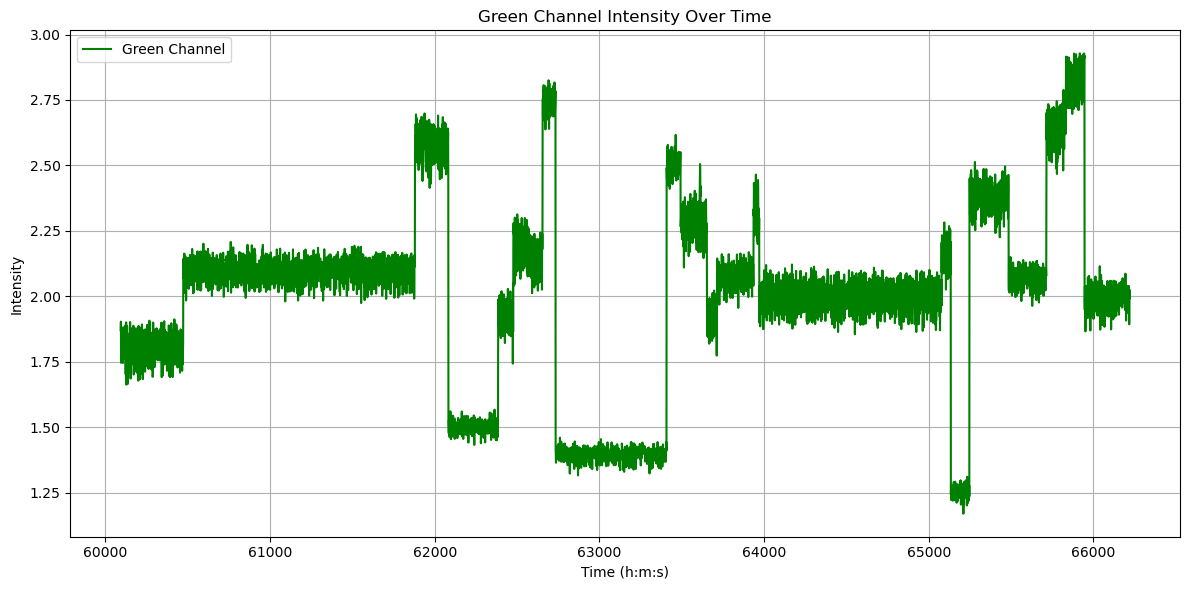

In [23]:
plot_rgb(df, start_datetime, end_datetime)

## 2. Radar signal processing

### Filtering methods (TODO)

In [ ]:
# from scipy.signal import filtfilt, butter

# def separate_breath_and_heartbeat(signal):
#         breath_signal = bandpass_filter(signal, 0.18, 0.35, order=5)
#         heartbeat_signal = bandpass_filter(signal, 1.0, 2.0, order=5)
#         return breath_signal, heartbeat_signal

# def plot_separated_signals(breath_signal, heartbeat_signal):
#     plt.figure(figsize=(10, 8))
    
#     plt.subplot(2, 1, 1)
#     plt.plot(breath_signal)
#     plt.xlabel('Time (s)')
#     plt.ylabel('Amplitude')
#     plt.title('Separated Breath Signal')
    
#     plt.subplot(2, 1, 2)
#     plt.plot(heartbeat_signal)
#     plt.xlabel('Time (s)')
#     plt.ylabel('Amplitude')
#     plt.title('Separated Heartbeat Signal')
    
#     plt.tight_layout()
#     plt.show()
    
# def bandpass_filter(signal, lowcut, highcut, order=5):
#     nyq = 0.5 * 10
#     low = lowcut / nyq
#     high = highcut / nyq
#     b, a = butter(order, [low, high], btype='band')
#     filtered_signal = filtfilt(b, a, signal)
#     print(low)
#     print(high)
#     print(b)
#     print(a)
#     print(filtered_signal)

#     return filtered_signal

# breath, heart = separate_breath_and_heartbeat(filtered_signal)
# plot_separated_signals(breath, heart)

### Data extraction and processing methods

In [2]:


def extract_data_subset(data, start_datetime, end_datetime):
    """
    Extracts a subset of data from a DataFrame given the start and end datetimes.
    
    Parameters:
    - data: DataFrame containing the data.
    - start_datetime: Start datetime as a datetime object.
    - end_datetime: End datetime as a datetime object.
    
    Returns:
    - A DataFrame containing the subset of data between the specified start and end datetimes.
    """
    # Ensure 'timestamp' column is in datetime format
    data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y%m%d%H%M%S%f')
    
    # Filter the data based on the start and end datetimes
    data_subset = data[(data['timestamp'] >= start_datetime) & (data['timestamp'] <= end_datetime)]

    return data_subset

def process_signal(data, sample_rate):
    """
    Process the signal by performing arctan demodulation, phase unwrapping,
    detrending, and low-pass filtering.

    Parameters:
    - data: DataFrame containing the in-phase (data_i) and quadrature (data_q) components of the signal.
    - sample_rate: The sample rate of the signal.

    Returns:
    - filtered_signal: The processed signal.
    """
    
    # Extract the data columns
    data_i = data['data_i'].astype(float)
    data_q = data['data_q'].astype(float)

    # Perform arctan demodulation
    sig = np.arctan2(data_q, data_i)

    # Perform phase unwrapping
    sig_unwrapped = np.unwrap(np.angle(sig))
    sig_unwrapped = detrend(sig_unwrapped)

    # Design a low-pass filter and apply it
    d1 = butter(4, 5 / (0.5 * sample_rate), btype='low')
    filtered_signal = filtfilt(d1[0], d1[1], sig_unwrapped)

    return filtered_signal

def plot_processed_data(data, sample_rate, start_datetime, end_datetime):
    """
    Plots the processed signal data with time labels for start and end datetimes.

    Parameters:
    - data: DataFrame containing the signal data.
    - sample_rate: The sample rate of the signal.
    - start_datetime: The start datetime of the data as a string.
    - end_datetime: The end datetime of the data as a string.
    """

    # Extract the data subset based on the start and end datetimes
    data_subset = extract_data_subset(data, start_datetime, end_datetime)

    # Process the signal
    filtered_signal = process_signal(data_subset, sample_rate)
        
    # Plot the processed signal
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_signal, label='Unwrapped Phase')
    plt.xlabel('Time (h:m:s)')
    plt.ylabel('Phase (radians)')
    plt.title('Phase Unwrapping of Radar Signal')
    plt.legend()
    plt.grid(True)
    # Adjust x-axis labels to show only the start and end
    plt.xticks([0, len(filtered_signal) - 1], [start_datetime, end_datetime])
    plt.tight_layout()
    plt.show()

### Load data

In [26]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.signal import butter, filtfilt, detrend

# Sample file path
file_path = "/Users/w.z/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/SleepData/苏州大学附属医院/Radar/radar20240620220948433561.csv"

# Load the data from the file
data = pd.read_csv(file_path)
start_time = pd.to_datetime(data['timestamp'].iloc[0], format='%Y%m%d%H%M%S%f').strftime('%H%M%S') # 22:09:48
sample_rate = 1000

### Extract the data subset

In [4]:
# Define start and end datetime objects
start_datetime = datetime.strptime('20240620221948', '%Y%m%d%H%M%S')
end_datetime = datetime.strptime('20240620222049', '%Y%m%d%H%M%S')

# Extract the data subset
data_subset = extract_data_subset(data, start_datetime, end_datetime)

# Display the first few rows of the subset
print(data_subset.head())

                        timestamp  data_i  data_q
600814 2024-06-20 22:19:48.002360  -0.049  -0.011
600815 2024-06-20 22:19:48.002360  -0.032   0.003
600816 2024-06-20 22:19:48.002360  -0.041  -0.013
600817 2024-06-20 22:19:48.004360  -0.046  -0.017
600818 2024-06-20 22:19:48.005361  -0.054  -0.025


### Plot the processed radar data

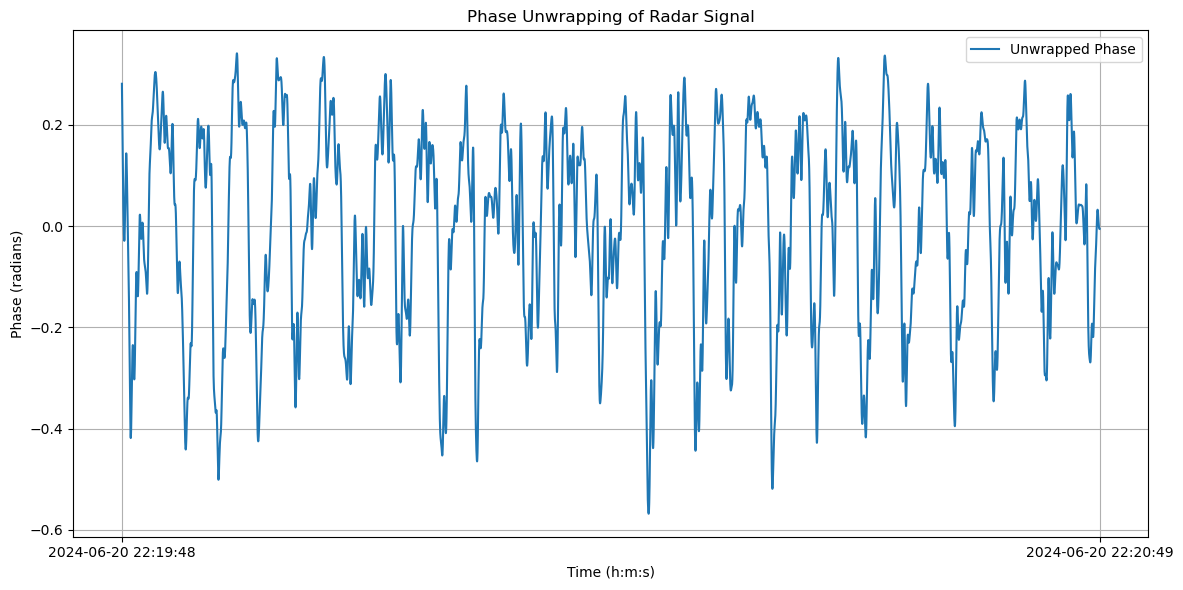

In [25]:
plot_processed_data(data, sample_rate, start_datetime, end_datetime)


### Frequency analysis: FFT plot

In [ ]:
# Assuming sig_unwrapped is a 1D numpy array
# Compute the FFT of the signal
fft_values = np.fft.fft(sig_unwrapped)

# Compute the frequencies corresponding to the FFT values
# N is the number of points in sig_unwrapped, and T is the sampling interval
N = len(sig_unwrapped)
T = 1/sample_rate  # Assuming a sampling rate of 1 Hz, adjust T according to your actual sampling rate
frequencies = np.fft.fftfreq(N, T)

# Compute the magnitude of the FFT values
magnitude = np.abs(fft_values)

# Compute the one-sided frequency range
# Include Nyquist frequency only if N is odd
if N % 2 == 0:
    freq_range = frequencies[:N//2]
    magnitude_range = magnitude[:N//2]
else:
    freq_range = frequencies[:(N+1)//2]
    magnitude_range = magnitude[:(N+1)//2]

# Plot the one-sided frequency map
plt.figure(figsize=(10, 6))
plt.plot(freq_range, magnitude_range)
plt.title('One-sided Frequency Map of sig_unwrapped')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 5)  # Limit the x-axis to 0 to 5 Hz
plt.grid(True)
plt.show()

### Downsampling methods (TODO)

In [67]:
import pandas as pd
import numpy as np
from scipy.signal import resample

def calculate_sampling_rate(timestamps, desired_sampling_rate):
    """
    Calculates the original sampling rate and the downsample factor based on desired sampling rate.

    Parameters:
    - timestamps: Pandas Series of timestamps.
    - desired_sampling_rate: The desired sampling rate after downsampling.

    Returns:
    - A tuple containing the original sampling rate and the downsample factor.
    """
    time_diffs = timestamps.diff().dropna()
    avg_time_diff = time_diffs.mean().total_seconds()
    original_sampling_rate = 1 / avg_time_diff
    downsample_factor = int(original_sampling_rate / desired_sampling_rate)
    
    return original_sampling_rate, downsample_factor

def downsample_signal(data, sampling_type='average', desired_sampling_rate=128):
    """
    Downsamples the signal data to a desired sampling rate using either the Fourier or average method.
    
    Parameters:
    - data: DataFrame containing the signal data with 'timestamp', 'data_i', and 'data_q' columns.
    - sampling_type: The method of downsampling ('fourier' or 'average'). Default is 'average'.
    - desired_sampling_rate: The desired sampling rate after downsampling. Default is 128 Hz.
    
    Returns:
    - A DataFrame containing downsampled 'timestamp', 'data_i', and 'data_q' columns.
    """
    # Make a copy of the original data
    data_copy = data.copy()
    
    # Convert the timestamps to datetime objects and calculate the original sampling rate
    timestamps = pd.to_datetime(data_copy['timestamp'], format='%Y%m%d%H%M%S%f')
    original_sampling_rate, downsample_factor = calculate_sampling_rate(timestamps, desired_sampling_rate)

    
    # Extract the data columns
    data_i = data_copy['data_i'].astype(float)
    data_q = data_copy['data_q'].astype(float)
    
    if sampling_type == 'fourier':
        # Fourier method down-sampling
        num_samples = len(data_i) // downsample_factor
        data_i_downsampled = resample(data_i, num_samples)
        data_q_downsampled = resample(data_q, num_samples)
        
        # Downsample timestamps by taking every nth timestamp
        timestamps_downsampled = timestamps[::downsample_factor].reset_index(drop=True)
    else:
        # Average method down-sampling
        def average_downsample(signal, factor):
            n = len(signal) // factor
            return np.mean(signal.values[:n*factor].reshape(-1, factor), axis=1)
        
        data_i_downsampled = average_downsample(data_i, downsample_factor)
        data_q_downsampled = average_downsample(data_q, downsample_factor)
        
        timestamps_downsampled = average_downsample(timestamps.astype(np.int64), downsample_factor)
        timestamps_downsampled = pd.to_datetime(timestamps_downsampled)
        
    # Ensure the lengths of downsampled arrays match
    min_length = min(len(timestamps_downsampled), len(data_i_downsampled), len(data_q_downsampled))
    timestamps_downsampled = timestamps_downsampled[:min_length]
    data_i_downsampled = data_i_downsampled[:min_length]
    data_q_downsampled = data_q_downsampled[:min_length]

    # Create a DataFrame with downsampled data
    downsampled_data = pd.DataFrame({
        'timestamp': timestamps_downsampled,
        'data_i': data_i_downsampled,
        'data_q': data_q_downsampled
    })
    
    return downsampled_data

# Example usage
# data = pd.read_csv('path_to_your_data.csv')
# downsampled_data = downsample_signal(data, sampling_type='average', desired_sampling_rate=128)


In [68]:
downsampled_data = downsample_signal(data_subset, sampling_type='average', desired_sampling_rate=128)
downsampled_data.head()


,timestamp,data_i,data_q
0,2024-06-20 22:19:48.004217344,-0.046286,-0.015000
1,2024-06-20 22:19:48.011075840,-0.045714,-0.013571
2,2024-06-20 22:19:48.017934080,-0.047143,-0.017143
3,2024-06-20 22:19:48.025361664,-0.053000,-0.022714
4,2024-06-20 22:19:48.032218880,-0.047857,-0.017714


In [69]:
timestamp_diffs = downsampled_data['timestamp'].diff().dropna()
timestamp_diffs.describe()

count                         8731
mean     0 days 00:00:00.006985470
std      0 days 00:00:00.000331367
min      0 days 00:00:00.003715328
25%      0 days 00:00:00.006714624
50%      0 days 00:00:00.006859264
75%      0 days 00:00:00.007143424
max      0 days 00:00:00.009713920
Name: timestamp, dtype: object

In [70]:
downsampled_data = downsample_signal(data_subset, sampling_type='fourier', desired_sampling_rate=128)
downsampled_data.head()


,timestamp,data_i,data_q
0,2024-06-20 22:19:48.002360,-0.046814,-0.013302
1,2024-06-20 22:19:48.008361,-0.044445,-0.013762
2,2024-06-20 22:19:48.014361,-0.047156,-0.016309
3,2024-06-20 22:19:48.022364,-0.054211,-0.024736
4,2024-06-20 22:19:48.028361,-0.047424,-0.016106


In [71]:
timestamp_diffs = downsampled_data['timestamp'].diff().dropna()
timestamp_diffs.describe()

count                         8731
mean     0 days 00:00:00.006985438
std      0 days 00:00:00.001028855
min         0 days 00:00:00.002004
25%         0 days 00:00:00.006000
50%         0 days 00:00:00.007000
75%         0 days 00:00:00.008000
max         0 days 00:00:00.011002
Name: timestamp, dtype: object

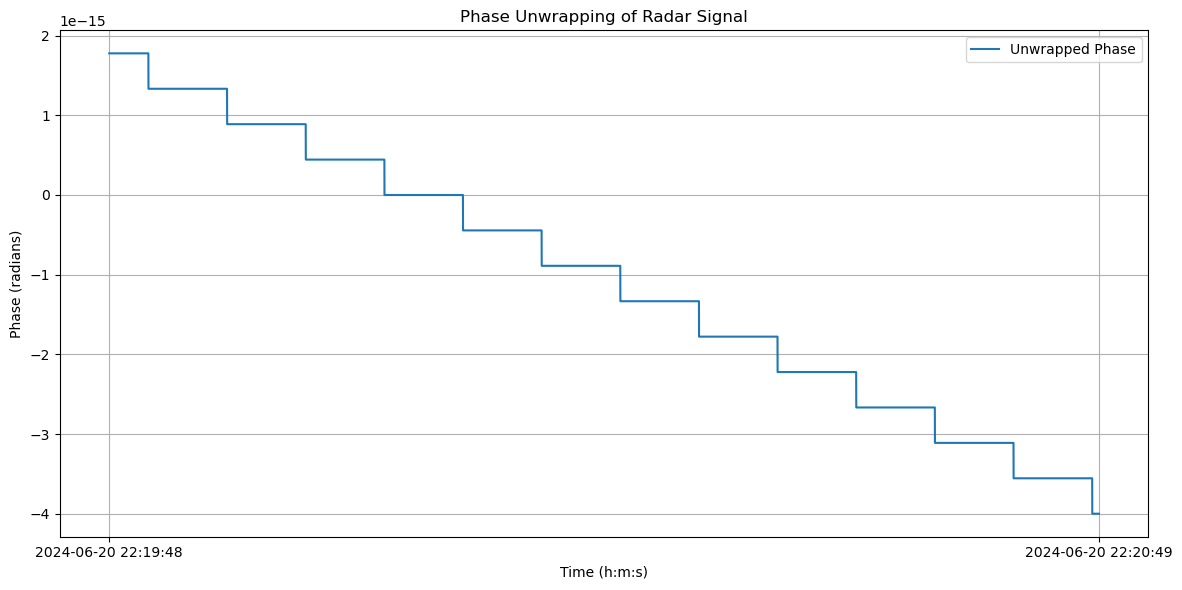

In [78]:
desired_sampling_rate=128

# Process the signal
filtered_signal = process_signal(downsampled_data, desired_sampling_rate)
    
# Plot the processed signal
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label='Unwrapped Phase')
plt.xlabel('Time (h:m:s)')
plt.ylabel('Phase (radians)')
plt.title('Phase Unwrapping of Radar Signal')
plt.legend()
plt.grid(True)
# Adjust x-axis labels to show only the start and end
plt.xticks([0, len(filtered_signal) - 1], [start_datetime, end_datetime])
plt.tight_layout()
plt.show()

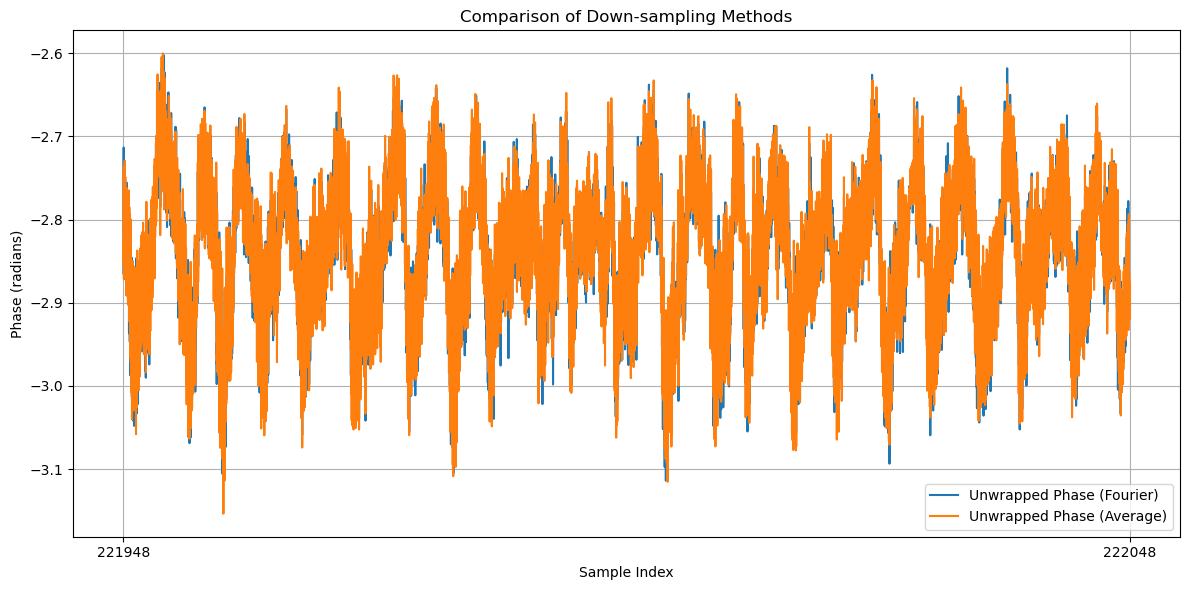

In [76]:
from scipy.signal import resample

data = data_subset

# Extract the data columns
timestamps = data['timestamp'].astype(str)
data_i = data['data_i'].astype(float)
data_q = data['data_q'].astype(float)

# Convert the timestamps to datetime objects
timestamps = pd.to_datetime(timestamps, format='%Y-%m-%d %H:%M:%S.%f')

# Calculate the original sampling rate
time_diffs = timestamps.diff().dropna()
avg_time_diff = time_diffs.mean().total_seconds()
original_sampling_rate = 1 / avg_time_diff

# Desired sampling rate for downsampling
desired_sampling_rate = 128
downsample_factor = int(original_sampling_rate / desired_sampling_rate)

# 1. Fourier method down-sampling
data_i_fourier = resample(data_i, len(data_i) // downsample_factor)
data_q_fourier = resample(data_q, len(data_q) // downsample_factor)
# timestamps_downsampled = resample(timestamps.astype(int).values, len(timestamps) // downsample_factor)
# timestamps_downsampled = pd.to_datetime(timestamps_downsampled)

# 2. Average method down-sampling
def average_downsample(signal, factor):
    n = len(signal) // factor
    return np.mean(signal.values[:n*factor].reshape(-1, factor), axis=1)


data_i_avg = average_downsample(data_i, downsample_factor)
data_q_avg = average_downsample(data_q, downsample_factor)

# Perform arctan demodulation
sig_fourier = np.arctan2(data_q_fourier, data_i_fourier)
sig_avg = np.arctan2(data_q_avg, data_i_avg)

# Perform phase unwrapping
sig_unwrapped_fourier = np.unwrap(sig_fourier)
sig_unwrapped_avg = np.unwrap(sig_avg)

# # Extract HMS from the downsampled timestamps
timestamps_hms = timestamps.dt.strftime('%H%M%S')

# Plot the processed data
plt.figure(figsize=(12, 6))
plt.plot(sig_unwrapped_fourier, label='Unwrapped Phase (Fourier)')
plt.plot(sig_unwrapped_avg, label='Unwrapped Phase (Average)')
plt.xlabel('Sample Index')
plt.ylabel('Phase (radians)')
plt.title('Comparison of Down-sampling Methods')
plt.legend()
plt.grid(True)

# Adjust x-axis labels to show only the start and end
plt.xticks([0, len(sig_unwrapped_fourier) - 1], [timestamps_hms.iloc[0], timestamps_hms.iloc[-1]])

plt.tight_layout()
plt.show()

In [ ]:

print(f"Average time difference between samples: {avg_time_diff:.6f} seconds")
print(f"Estimated sampling rate: {sampling_rate:.2f} samples per second")


## 3. PSG signal processing

### Load data

In [28]:
import nbimporter
# Import the PSGDataProcessor class
from align_radar_psg import PSGDataProcessor

# Define the path to the EDF file
edf_file_path = "/Users/w.z/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/SleepData/苏州大学附属医院/PSG/2024-6-20jiangyifan.edf"

# Create an instance of the PSGDataProcessor class
psg_processor = PSGDataProcessor()

# Load the data from the EDF file
psg_processor.load_data(edf_file_path)

# Access loaded data attributes
print(f"Sampling Rate: {psg_processor.sampling_rate}")
print(f"Channel Names: {psg_processor.ch_names}")
print(f"Start Datetime: {psg_processor.start_datetime}")



Extracting EDF parameters from /Users/w.z/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/SleepData/苏州大学附属医院/PSG/2024-6-20jiangyifan.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


align_radar_psg.ipynb:28: RuntimeWarning: Physical range is not defined in following channels:
Thor, Abdo, Sum
  "import pandas as pd\n",


Reading 0 ... 29025279  =      0.000 ... 28344.999 secs...
Sampling Rate: 1024.0
Channel Names: ['E1-M2', 'E2-M2', 'Chin 1-Chin 2', 'F4-M1', 'C4-M1', 'O2-M1', 'F3-M2', 'C3-M2', 'O1-M2', 'ECG', 'Pressure', 'Therm', 'Thor', 'Abdo', 'Sum', 'Mic', 'Position', 'SpO2', 'Ox Status', 'Leg/L', 'Leg/R', 'Pulse', 'Pleth']
Start Datetime: 2024-06-20 22:02:34


### Extract and plot a single PSG channel

Index of channel 'ECG': 9


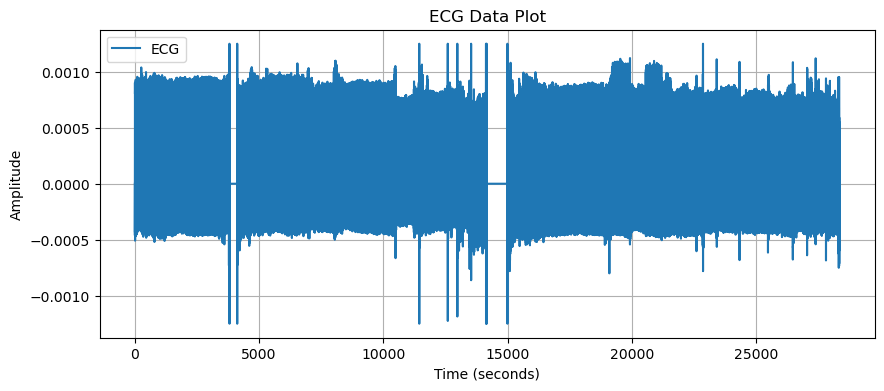

In [29]:
# Store channel names and their corresponding indices in a dictionary
channel_indices = {channel_name: idx for idx, channel_name in enumerate(psg_processor.ch_names)}

# Example usage: get the index of the 'ECG' channel
channel = 'ECG'
idx = channel_indices[channel]
print(f"Index of channel '{channel}': {idx}")
# Plot the data given channel index
psg_processor.plot_data(psg_processor.raw_data[idx],psg_processor.ch_names[idx], psg_processor.sampling_rate)


### Extract and plot given a time range

In [30]:
from datetime import datetime

# Extract data between two timestamps
start_datetime = datetime(2024, 6, 20, 22, 19, 48) # Replace with your actual start datetime
end_datetime = datetime(2024, 6, 20, 22, 20, 48)  # Replace with your actual end datetime
data_types = ['ECG', 'Thor']  # Replace with your actual data types

extracted_data = psg_processor.extract_segment_by_timestamp(start_datetime, end_datetime, data_types)

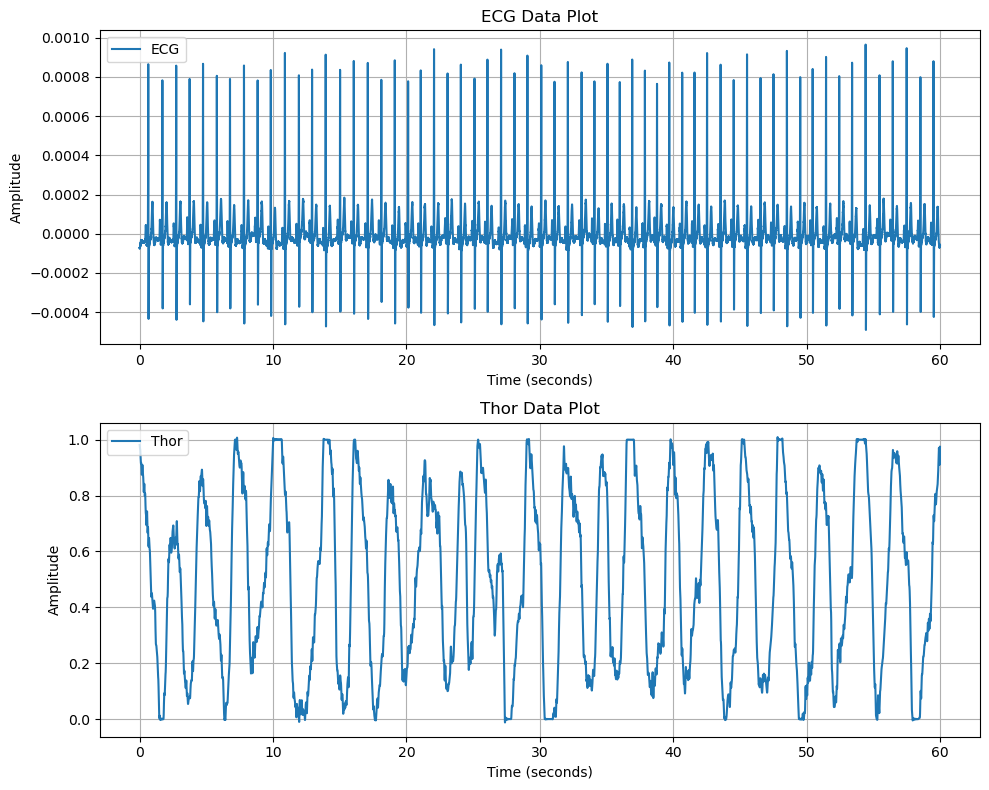

In [35]:
# Plot the comparison of extracted channels
psg_processor.compare_plot(extracted_data, data_types, psg_processor.sampling_rate)


## 4. Comparison: Radar, RGB and PSG Data

In [36]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, detrend
from align_radar_psg import PSGDataProcessor

## 1. Load & extract data
# Load RGB data
rgb_file_path = '/Users/w.z/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/SleepData/苏州大学附属医院/Camera/camera20240620220949415042.csv'
rgb_data = pd.read_csv(rgb_file_path)
rgb_data['timestamp'] = pd.to_datetime(rgb_data['timestamp'], format='%Y%m%d%H%M%S%f')

# Define the time range
start_datetime = datetime.strptime('20240620221948', '%Y%m%d%H%M%S')
end_datetime = datetime.strptime('20240620222049', '%Y%m%d%H%M%S')

# Extract the RGB data subset
rgb_subset = extract_data_subset(rgb_data, start_datetime, end_datetime)


# Load Radar data
radar_file_path = "/Users/w.z/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/SleepData/苏州大学附属医院/Radar/radar20240620220948433561.csv"
radar_data = pd.read_csv(radar_file_path)
radar_data['timestamp'] = pd.to_datetime(radar_data['timestamp'], format='%Y%m%d%H%M%S%f')
sample_rate = 1000

# Extract the Radar data subset
radar_subset = extract_data_subset(radar_data, start_datetime, end_datetime)


# Load PSG data
psg_processor = PSGDataProcessor()
psg_processor.load_data("/Users/w.z/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/SleepData/苏州大学附属医院/PSG/2024-6-20jiangyifan.edf")
data_types = ['ECG', 'Thor']
# Extract PSG data for the same time range
psg_subset = psg_processor.extract_segment_by_timestamp(start_datetime, end_datetime, data_types)


## 2. Plot all data types
plot_rgb(rgb_subset, start_datetime, end_datetime)
plot_processed_data(radar_subset, sample_rate, start_datetime, end_datetime)
psg_processor.compare_plot(psg_subset, data_types, psg_processor.sampling_rate)


In [ ]:
## RGB data
# Load the CSV file
file_path = '/Users/w.z/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/SleepData/苏州大学附属医院/Camera/camera20240620220949415042.csv'
df = pd.read_csv(file_path)

# Convert timestamp to a proper datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H%M%S%f')

# Define start and end datetime objects
start_datetime = datetime.strptime('20240620221948', '%Y%m%d%H%M%S')
end_datetime = datetime.strptime('20240620222049', '%Y%m%d%H%M%S')

# Extract the data subset
df_subset = extract_data_subset(df, start_datetime, end_datetime)

# Display the first few rows of the subset
print(df_subset.head())

plot_rgb(df, start_datetime, end_datetime)



## Radar data
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.signal import butter, filtfilt, detrend

# Sample file path
file_path = "/Users/w.z/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/SleepData/苏州大学附属医院/Radar/radar20240620220948433561.csv"

# Load the data from the file
data = pd.read_csv(file_path)
start_time = pd.to_datetime(data['timestamp'].iloc[0], format='%Y%m%d%H%M%S%f').strftime('%H%M%S') # 22:09:48
sample_rate = 1000

# Define start and end datetime objects
start_datetime = datetime.strptime('20240620221948', '%Y%m%d%H%M%S')
end_datetime = datetime.strptime('20240620222049', '%Y%m%d%H%M%S')

# Extract the data subset
data_subset = extract_data_subset(data, start_datetime, end_datetime)

# Display the first few rows of the subset
print(data_subset.head())

plot_processed_data(data, sample_rate, start_datetime, end_datetime)


## PSG data
import nbimporter
# Import the PSGDataProcessor class
from align_radar_psg import PSGDataProcessor

# Define the path to the EDF file
edf_file_path = "/Users/w.z/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/SleepData/苏州大学附属医院/PSG/2024-6-20jiangyifan.edf"

# Create an instance of the PSGDataProcessor class
psg_processor = PSGDataProcessor()

# Load the data from the EDF file
psg_processor.load_data(edf_file_path)

# Access loaded data attributes
print(f"Sampling Rate: {psg_processor.sampling_rate}")
print(f"Channel Names: {psg_processor.ch_names}")
print(f"Start Datetime: {psg_processor.start_datetime}")

from datetime import datetime

# Extract data between two timestamps
start_datetime = datetime(2024, 6, 20, 22, 19, 48) # Replace with your actual start datetime
end_datetime = datetime(2024, 6, 20, 22, 20, 48)  # Replace with your actual end datetime
data_types = ['ECG', 'Thor']  # Replace with your actual data types

extracted_data = psg_processor.extract_segment_by_timestamp(start_datetime, end_datetime, data_types)

# Plot the comparison of extracted channels
psg_processor.compare_plot(extracted_data, data_types, psg_processor.sampling_rate)

